# Ice fitting workshop - 15/October/2024

### About ENIIGMA

This Jupyter notebook contains a tutorial of the ENIIGMA fitting tool (Rocha et al. 2021).
Specifically, it shows: 

(I) the steps for continuum determination of the infrared spectrum of protostars;

(II) how to perform the spectral fitting of ice bands using laboratory spectrum;

(III) introduce the statistical analysis after the fit, which covers confidence interval analysis, column density determination and degenacy assessment of the fits.

### Documentation

The ENIIGMA fitting tool has two sources of documentation:

1) Rocha et al. (2021): https://www.aanda.org/articles/aa/abs/2021/10/aa39360-20/aa39360-20.html

2) Readthedocs: https://eniigma-fitting-tool.readthedocs.io/en/latest/

### Example of literature citing ENIIGMA

- Rocha et al. (2024): https://www.aanda.org/articles/aa/full_html/2024/03/aa48427-23/aa48427-23.html
- McClure, Rocha et al. (2023): https://www.nature.com/articles/s41550-022-01875-w 

### Installation

You can find the installation steps and the required packages to run ENIIGMA at the "readthedocs" documentation.

### Jupyter notebook

ENIIGMA is also available as Jupyter notebooks. In that case, no installation is required.

### Import modules

As a standard python code, here, you import the modules needed to run the ENIIGMA functions.

In [7]:
import pyevolve
%matplotlib inline
from pyevolve import GSimpleGA
from ENIIGMA.GA import optimize
from ENIIGMA.GA import check_ga
from ENIIGMA.Stats import Pie_chart_plots
from ENIIGMA.Stats import Bar_chart_plots
from ENIIGMA.Stats import Stats_Module
from ENIIGMA.Stats import Degen_plots
import ENIIGMA
from pyevolve import G1DList, GSimpleGA, Selectors, Crossovers
from pyevolve import Initializators, Mutators, Consts
from pyevolve import Interaction
from pyevolve import Statistics
from pyevolve import DBAdapters
from pyevolve import Scaling

### Genetic algorithm optimization

Once the optical depth is obtained, ENIIGMA performs the spectral fitting using the laboratory data. The function used here is **optimize.ENIIGMA**. The input information are:

1) **filename:** the path to the file containing the optical depth spectrumm;

2) the range to perform the fit;

3) **list_sp:** a list with the initial guess of species to start the fitting;

4) **group_comb:** sets how to group potential solutions to fit the observation data. This informaiton is used in the very last stage of the code.

5) **skip:** when *True* the code performs the fit using only the species included in the *list_sp*. When *False*, ENIIGMA searches for the best combination within the entire ensamble of laboratory data.

6) **pathlib:** when *None* the code uses the standard library of experimental data. Otherwise, users can indicate the path to their own library of data.

7) **ga_max:** sets a limit for the coefficients of the linear combination during the optmization process.


An example is given below:

 
 
|			ENIIGMA CODE				|
| A Python module for the decomposition of IR ice spectra using |
|        laboratory data and genetic modeling algorithm         |
|                   Current Version: V.0                        |
|                         April 2020                            |
DIR: /Users/willrocha/ENIIGMA_workshop_Toulouse/
Performing a linear combination of pure ices...
(0, 1, 2, 3, 4, 5)
0
CO_CO2_15Kbs.dat
1
CO.dat
2
H2O_NH3_Schutte.dat
3
H2O_CH3OH_8p.dat
4
H2O_CH4_10_06_a_V3.dat
5
CO_CH3OH_4_1_15K_bs.dat
round 1 of 1 Score = 0.201421
0 1
1 3
2 5
3 7
4 9
5 11
 
 
Final score values [Best fit]
----------------------------------
Reduced chi-square: 6024948.898974719
Chi-square: 45410039851.572464
Akaike Information Criterion: 6024960.9101197375
Root-mean-square error (RMSE): 0.20142119408658457
----------------------------------

 The elapsed time was: 15 sec


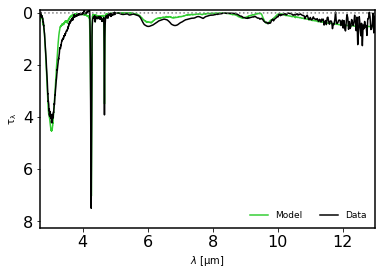

In [2]:
filename = 'Removed_silicate_spectrum.txt'
list_sp = ['CO', 'CO_CH3OH_4_1_15K_bs', 'H2O_CH3OH_8p', 'CO_CO2_15Kbs', 'H2O_CH4_10_06_a_V3', 'H2O_NH3_Schutte']

#optimize.ENIIGMA(filename, 2.7, 13.0, list_sp_skipTrue, group_comb=3, skip=True, pathlib = None, ga_max = 5.5)


optimize.ENIIGMA(filename, 2.7, 13.0, list_sp, group_comb=6, n_points=7544, skip=True, pathlib = None, 
                 ga_min = 0.0, ga_max = 5.5, mutp=0.01, popsize=100, fitness='rmse', 
                 mutator=Mutators.G1DListMutatorRealGaussian,crossover=Crossovers.G1DBinaryStringXSinglePoint, 
                 scaling=Scaling.LinearScaling,selector=Selectors.GTournamentSelector, 
                 termination=GSimpleGA.ConvergenceCriteria)


# Plot components

/Users/willrocha/ENIIGMA_workshop_Toulouse
names
['H2O_NH3_Schutte', 'H2O_CH3OH_8p', 'CO_CO2_15Kbs', 'CO', 'H2O_CH4_10_06_a_V3', 'CO_CH3OH_4_1_15K_bs']
-----------
/Users/willrocha/ENIIGMA_workshop_Toulouse/Workspace/Processing/Interp_proc/Component_00.comp
/Users/willrocha/ENIIGMA_workshop_Toulouse/Workspace/Processing/Interp_proc/Component_01.comp
/Users/willrocha/ENIIGMA_workshop_Toulouse/Workspace/Processing/Interp_proc/Component_02.comp
/Users/willrocha/ENIIGMA_workshop_Toulouse/Workspace/Processing/Interp_proc/Component_03.comp
/Users/willrocha/ENIIGMA_workshop_Toulouse/Workspace/Processing/Interp_proc/Component_04.comp
/Users/willrocha/ENIIGMA_workshop_Toulouse/Workspace/Processing/Interp_proc/Component_05.comp


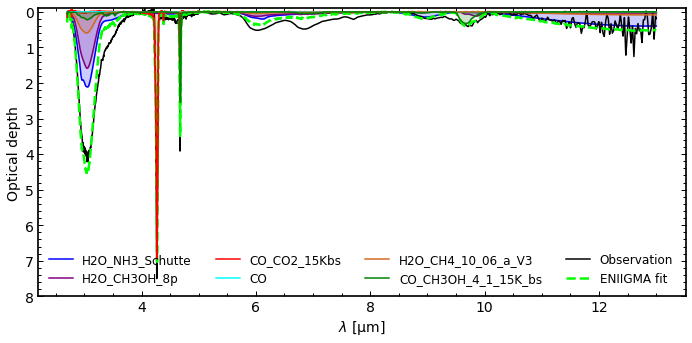

<Figure size 432x288 with 0 Axes>

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import pandas as pd
from scipy import interpolate
from matplotlib.patches import Rectangle
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, ScalarFormatter, LogLocator
from matplotlib.backends.backend_pdf import PdfPages
plt.rcParams['axes.linewidth'] = 1.7

pp = PdfPages('Components.pdf')

print(os.getcwd())

folder = os.getcwd() + '/'#'/Users/willrocha/eniigma_hh46_jn/'
files_L   = folder+'New_tau_GA.txt'

comp_path = folder+'Workspace/Processing/Interp_proc/*.comp'
allcomp = sorted(glob.glob(comp_path))

Best = folder+'Workspace/Processing/Interp_proc/Best_comb.csv'

df = pd.read_csv(Best,sep=',', header=1)
n_genes = df.shape[1] - 3 # number of genes

data = pd.read_csv(Best,sep=',', usecols=['name'], nrows=n_genes)
names = data.T.values.tolist()[0]

print('names')
print(names)
print('-----------')

l1,f1, ef1= np.loadtxt(files_L,dtype=float, usecols=(0,1,2)).T

fig1=plt.figure(figsize=(30,10.0))
frame1=fig1.add_axes((.1,.8,.3,.4))

### 5 components
cf = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
order = [1,2,3,4,5,6]
colors=['blue', 'purple', 'red', 'cyan', 'chocolate', 'green']

lbs = names

#exit()
yff = 0.
crange = range(len(cf))
for i in crange:
    #n = names[i]
    #print('Looking here:', allcomp[i])
    Xsp, Ysp = np.loadtxt(allcomp[i],dtype=float, usecols=(0,1)).T
    print(allcomp[i])
    yff += Ysp*cf[i]
    yff0 = Ysp*cf[i]
    frame1.plot(Xsp, yff0, color=colors[i], label=lbs[i], zorder=order[i])
    frame1.fill_between(Xsp, yff0, 0, color=colors[i], zorder=order[i], alpha=0.2)
    frame1.tick_params(which='major', length=5, width=1, direction='in', labelsize=12)
    frame1.tick_params(which='minor', length=3, width=1, direction='in', labelsize=12)
    frame1.yaxis.set_ticks_position('both')
    frame1.xaxis.set_ticks_position('both')


plt.plot(l1,f1, c='k', label='Observation')

plt.plot(Xsp, yff, linestyle='--', c='lime', label = 'ENIIGMA fit', linewidth=2.5)

np.savetxt('Bestfit.txt', np.transpose([Xsp, yff]))

plt.legend(loc='lower left', ncol=4, fontsize=12, frameon=False)
plt.ylabel(r'Optical depth',fontsize=14)
plt.xlabel(r'$\lambda\ \mathrm{[\mu m]}$',fontsize=14)
plt.setp(frame1.get_xticklabels(), visible=True)
frame1.minorticks_on()
frame1.tick_params(which='major', length=5, width=1, direction='in', labelsize=14)
frame1.tick_params(which='minor', length=3, width=1, direction='in', labelsize=14)
frame1.yaxis.set_ticks_position('both')
frame1.xaxis.set_ticks_position('both')
#plt.xlim(2.7,27.0)
plt.ylim(8., -0.1)



#plt.tight_layout()
plt.savefig(pp,format='pdf', bbox_inches='tight')
plt.show()
plt.clf()


pp.close()

### Statistical analisys

This is the third and last module of the ENIIGMA fitting tool. We show here how to use ENIIGMA's functionalities to evaluate the goodness of the fit.

#### Pie chart

This is feature aims at ranking the best solutions based on their statistical significance. Specifically, ENIIGMA calculates how frequent (recurrent) is a specific laboratory data inside a given confidence interval. For example, if the recurrence is 100%, this means that this data is present in all solutions. When the recurrence drops, say 80%, it means that the data is still significant, but there are solutions where it is not used.

To create Pie Chart plots, one can use the function **Pie_chart_plots.pie**. This function requires the input of the parameter *sig_level*. This means the $sigma$ confidence interval required by the user.

An example is given below:

Creating pie chart...
[1. 1. 1. 1. 1.] 1.0 [100. 100. 100. 100. 100.]


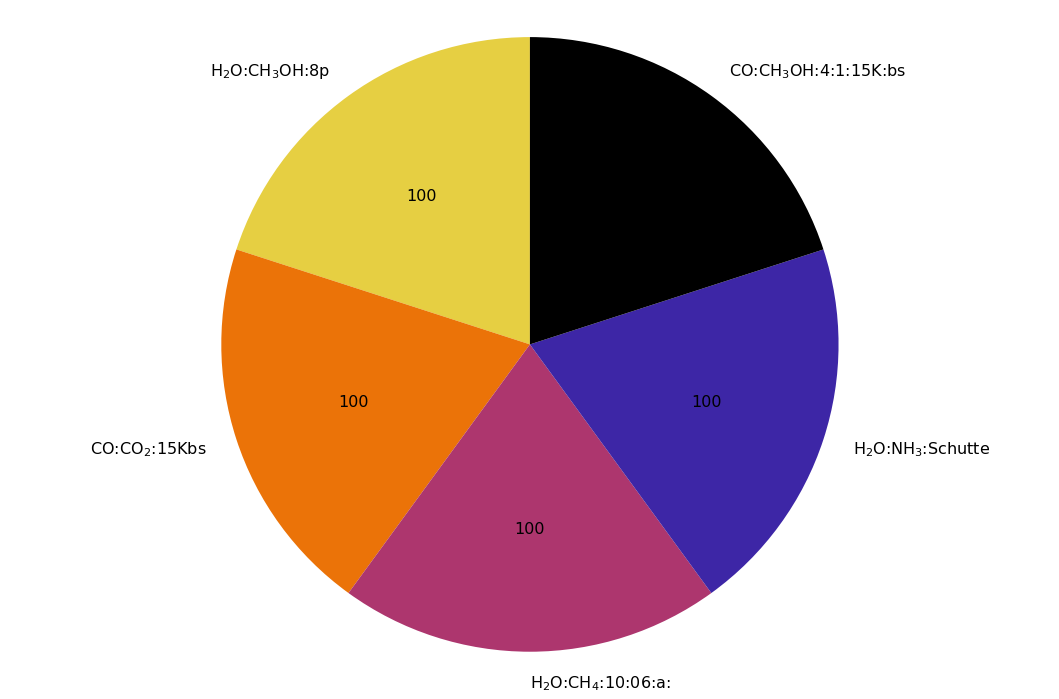

In [5]:
Pie_chart_plots.pie(sig_level=0.1)
#Bar_chart_plots.bar(sig_level=0.1)

#### Confidence intervals and column density determination

Here, ENIIGMA calculates the confidence intervals of the coefficients in the **best** solution. A few plots are created as output, which are described below in the sequence they appear:

1) Corner (triangle) plot: shows the correlations among all coefficients based on a $\chi^2$ analysis. In this case the confidence intervals are a function of the number of free parameters, not the goodness of the fit itself (see details in Avni & Bahcall 1980).

2) A plot with the best fit, and how it changes when the upper and lower confidence limits of the coefficients are adopted.

3) The best fit and the components overploted on the observational data. The residual fit is also shown.

4) A bar plot showing the column densities. **Note:** This only applies to the data included in the standard ENIIGMA library. If you uses your own library, ENIIGMA will not recognize, and consequently, no column density will be determined.

		RUNNING STATISTICAL MODULE
Calculation in progress....
s1+1: 1 2 H2O:NH3:Schutte
s1+1: 2 3 H2O:NH3:Schutte
s1+1: 3 4 H2O:NH3:Schutte
s1+1: 4 5 H2O:NH3:Schutte
s1+1: 5 6 H2O:NH3:Schutte
s0+1: 2
s0+1: 2
s0+1: 2
s0+1: 2
s0+1: 3
s0+1: 3
s0+1: 3
s0+1: 4
s0+1: 4
s0+1: 5
---------------------------------------------------
Making upper and lower confidence intervals...
---------------------------------------------------
---------------------------
Making deconvolution plot...
---------------------------
-----------------------------
Performing deconvolutions...
-----------------------------
Decomposing H2O_NH3_Schutte
Decomposing H2O_CH3OH_8p
Decomposing CO_CO2_15Kbs
Decomposing CO
Decomposing H2O_CH4_10_06_a_V3
Decomposing CO_CH3OH_4_1_15K_bs
Decomposing H2O_NH3_Schutte
Decomposing H2O_CH3OH_8p
Decomposing CO_CO2_15Kbs
Decomposing CO
Decomposing H2O_CH4_10_06_a_V3
Decomposing CO_CH3OH_4_1_15K_bs
Decomposing H2O_NH3_Schutte
Decomposing H2O_CH3OH_8p
Decomposing CO_CO2_15Kbs
Decomposing CO
Dec

<Figure size 432x288 with 0 Axes>

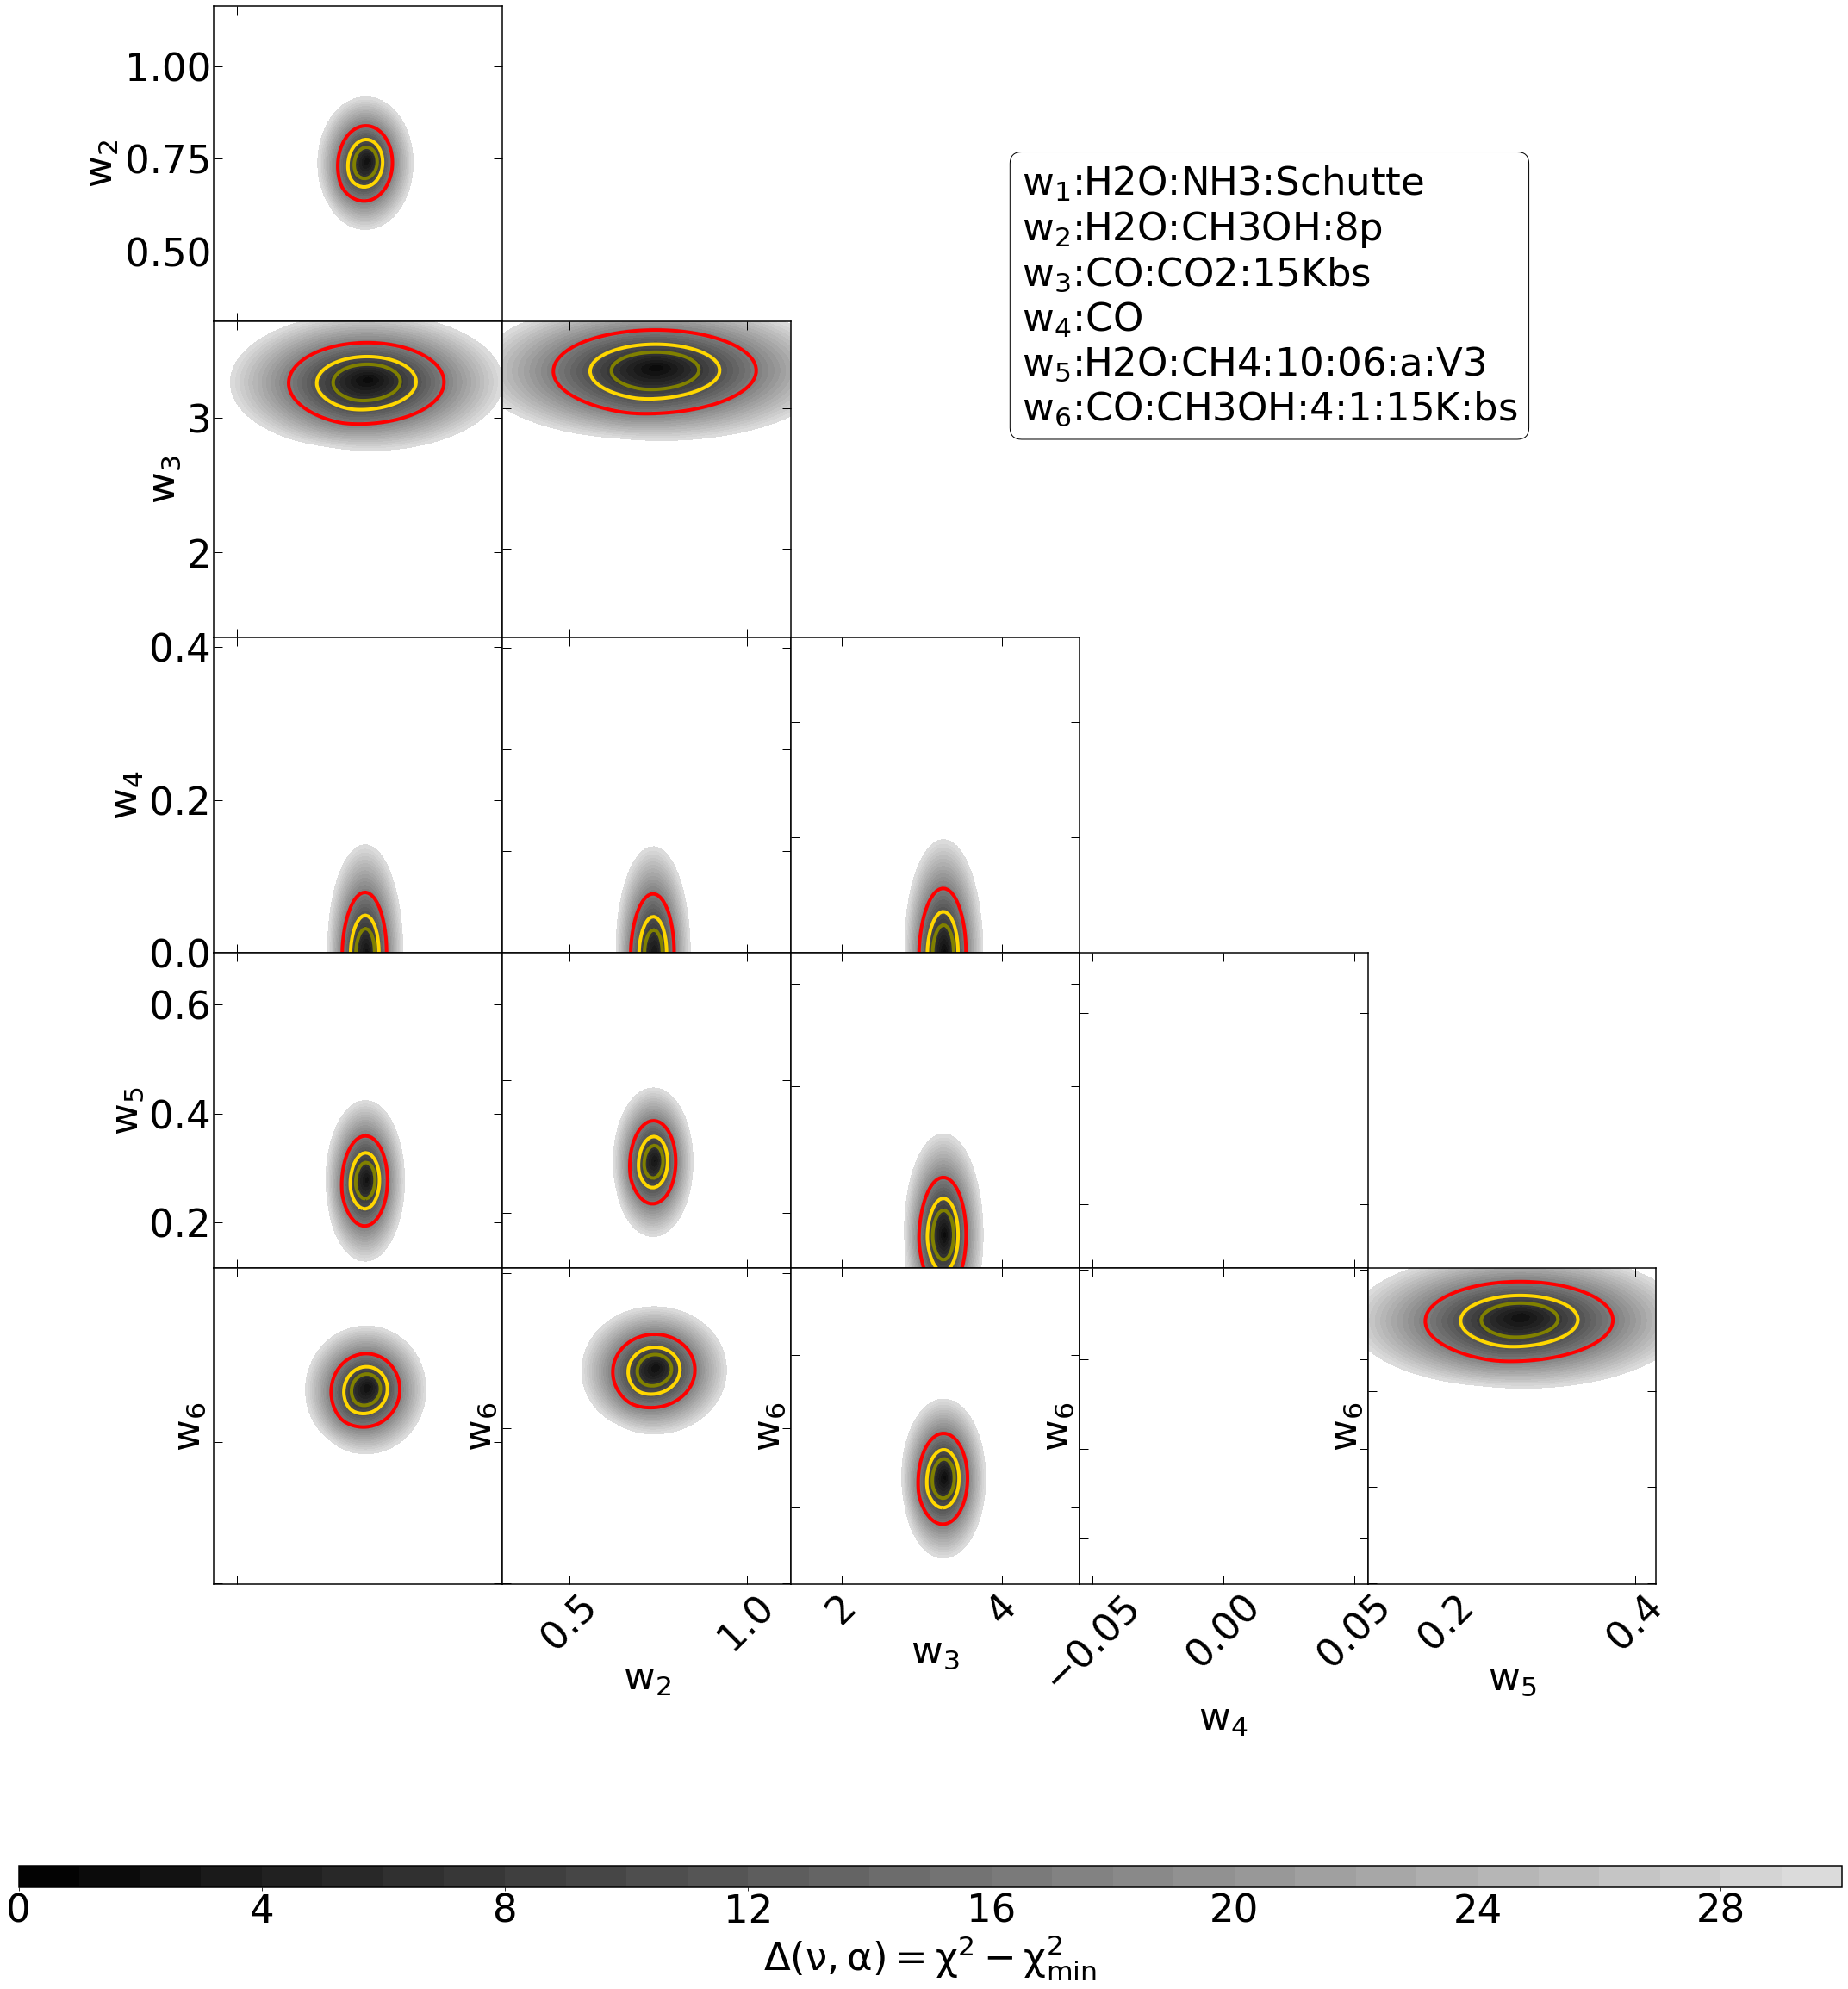

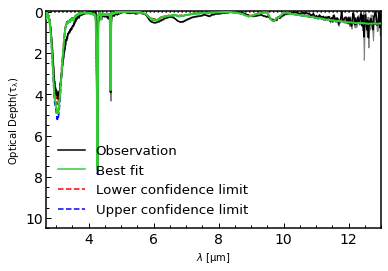

<Figure size 432x288 with 0 Axes>

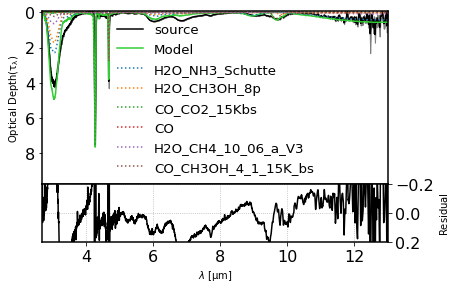

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [6]:
Stats_Module.stat(f_sig=0.1)

#### Mean column density determination

Ice fitting is not straightforward, and there are degeneracies intrinsic to the process. ENIIGMA provides a way to determine the mean ice column densities when all solutions (including the best solution) are taken into account. This can be done using the function **Degen_plots.merge_components**. 

As output, bar plots are shown containing the mean column densities, and the lower and upper limits.

An example is given below:

In [5]:
Degen_plots.merge_components_cd()

-------------------------------------------------------------------------
Searching for combinations inside 3 sigma confidence interval...
-------------------------------------------------------------------------
-------------------------------------------------------------------------
4  combinations found inside 3 sigma confidence interval

Deconvolving components and merging column densities...

Creating file: All_merge_final.csv
-------------------------------------------------------------------------
Decomposing H2O_NH3_Schutte
Decomposing H2O_CH3OH_8p
Decomposing CO_CO2_15Kbs
Decomposing CO
Decomposing CO_CH3OH_4_1_15K_bs
Decomposing H2O_NH3_Schutte
Decomposing H2O_CH3OH_8p
Decomposing CO_CO2_15Kbs
Decomposing H2O_CH4_10_06_a_V3
Decomposing CO_CH3OH_4_1_15K_bs
Decomposing H2O_CH3OH_8p
Decomposing CO_CO2_15Kbs
Decomposing CO
Decomposing H2O_CH4_10_06_a_V3
Decomposing CO_CH3OH_4_1_15K_bs
Decomposing H2O_NH3_Schutte
Decomposing H2O_CH3OH_8p
Decomposing CO
Decomposing H2O_CH4_10_06_a

/Users/willrocha/ENIIGMA_workshop_Toulouse/ENIIGMA/Stats/Degen_plots.py:217: FutureWarning: Passing non boolean values for sort is deprecated and will error in a future version!
  df = pd.concat(list(map(pd.read_csv, glob.glob(os.path.join('', "output_*.csv")))),


---------------------------------------
Making Fig_comb_hist.pdf...
---------------------------------------


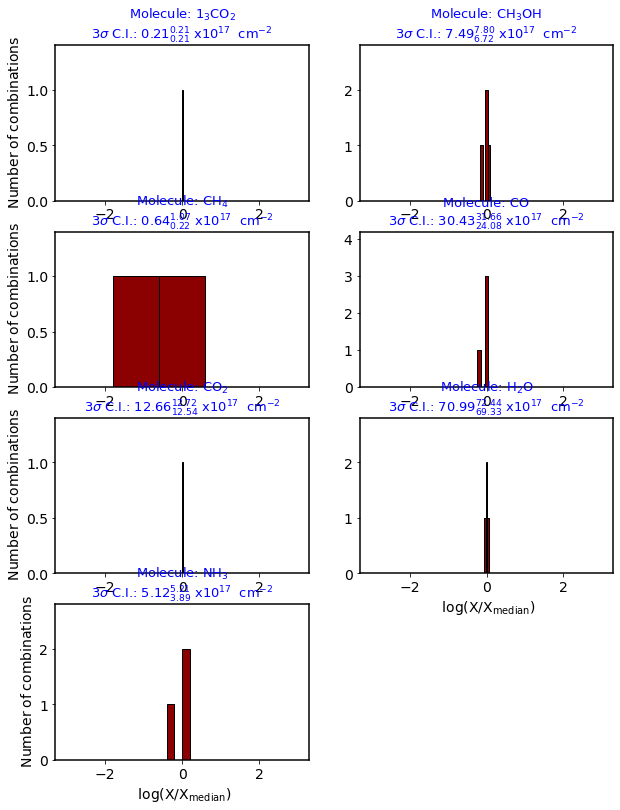

In [6]:
Degen_plots.hist_plot()